In [221]:
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
%%time
wb=pd.read_csv('data/array/GSE132203_Geo_Submission_GTPEpic.csv',nrows=1000000,usecols=[0]+list(range(1,1591,2)),index_col=0).round(3)

CPU times: user 3min 11s, sys: 14.6 s, total: 3min 26s
Wall time: 3min 27s


In [3]:
age=pd.read_table('https://ftp.ncbi.nlm.nih.gov/geo/series/GSE132nnn/GSE132203/matrix/GSE132203_series_matrix.txt.gz',skiprows=29+10,nrows=0,index_col=0).columns.str.strip('age: ').astype(float)

In [4]:
%%time 
wb_t=wb.T
wb_t['age']=age
wb_cor=wb_t.corrwith(wb_t['age']).drop('age').sort_values()

CPU times: user 3min 57s, sys: 1.49 s, total: 3min 59s
Wall time: 3min 59s


In [5]:
hmr=pd.read_table('/labs/mpsnyder/moqri/epi_deconv/data/arc/hmr/neo',header=None,index_col=3,usecols=[0,1,2,3])
hmr['b']=hmr[0].str[3:].astype(int)*10**9+hmr[1]
hmr['e']=hmr[0].str[3:].astype(int)*10**9+hmr[2]
hmr=hmr.sort_values('b')

In [24]:
man=pd.read_table('../Blood-DNA-Methylation-Atlas/data/ref/EPIC.hg38.manifest.tsv',index_col='Probe_ID')[['CpG_chrm','CpG_beg']]
man=man.dropna().copy()
man['CpG_beg']=man['CpG_beg'].astype(int)
man.columns=[0,1]
man=man[man[0].isin('chr'+str(c) for c in range(1,23))].copy()
#man['cg']=man.index

In [31]:
man=man.merge(wb_cor.rename('cor'),left_index=True,right_index=True)
man['pos']=man[0].str[3:].astype(int)*10**9+man[1]
man=man.sort_values('pos')
man.shape
#man['bin']=man['cor']>0

(800192, 4)

In [140]:
cg=wb_cor[wb_cor>.0917].head(1).index[0]
pearsonr(wb_t[cg],wb_t['age'])

PearsonRResult(statistic=0.09170011703738634, pvalue=0.009683327216200192)

In [54]:
pv=.0917

In [174]:
#man=man[man['cor']>.07].copy()

In [91]:
%%time 
#man=man[man['l']>0].copy()
cont=[]
c=0
last=False
last_l=-1
last_pos=man[1].head(1).values[0]
for i,b in man[[1,'cor']].iterrows():
    if b[1]-last_pos>1000:
        c+=1
    if b['cor']>pv:
        if last==False:
            c+=1
        last=True  
        cont.append(c)
    else:
        cont.append(-1)
        last=False
    last_pos=b[1]

CPU times: user 52.5 s, sys: 258 ms, total: 52.7 s
Wall time: 52.8 s


In [ ]:
man['cont']=cont
cor450=pd.read_csv('data/res/cor450.csv',index_col=0)
man=man.merge(cor450,left_index=True, right_index=True,how='left')

In [199]:
mgc=pd.DataFrame(man.groupby('cont')[0].count())
mgc['chr']=man.groupby('cont')[0].first()
mgc['b']=man.groupby('cont')[1].first()
mgc['e']=man.groupby('cont')[1].last()
mgc['cor']=man.groupby('cont')['cor'].mean()
mgc['cor450']=man.groupby('cont')['cor_450'].mean()
topp=mgc[mgc[0]>=3].sort_values('cor',ascending=False)
topp.head(20)

,0,chr,b,e,cor,cor450
cont,,,,,,
49023,3,chr2,105399281,105399309,0.717583,0.825327
72766,9,chr3,51706605,51707456,0.539097,0.723285
288581,4,chr15,72319783,72319879,0.526374,0.523217
32067,3,chr1,228212515,228212926,0.515130,0.589686
132279,3,chr6,27631361,27631395,0.497728,0.639231
12258,7,chr1,52842671,52843588,0.461199,0.498970
282143,3,chr15,31483202,31484246,0.445688,0.555696
341595,3,chr19,38256714,38256737,0.432265,0.496729
143029,5,chr6,127514604,127515013,0.427854,0.624143


In [200]:
topp.to_csv('data/res/epicor_p.csv')

array([[<Axes: title={'center': 'cor450'}>]], dtype=object)

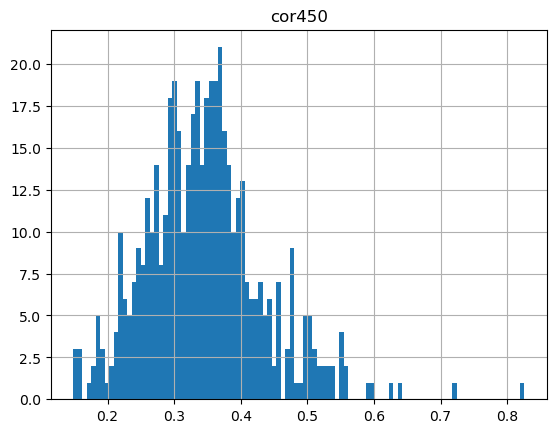

In [197]:
topl[['cor','cor450']].tail(500).hist('cor450',bins=100)

In [162]:
%%time 
#man=man[man['l']>0].copy()
cont=[]
c=0
last=False
last_l=-1
last_pos=man[1].head(1).values[0]
for i,b in man[[1,'cor']].iterrows():
    if b[1]-last_pos>1000:
        c+=1
    if b['cor']<-pv:
        if last==False:
            c+=1
        last=True  
        cont.append(c)
    else:
        cont.append(-1)
        last=False
    last_pos=b[1]

CPU times: user 52.7 s, sys: 121 ms, total: 52.8 s
Wall time: 52.9 s


In [163]:
man['neg']=cont

In [183]:
mgc=pd.DataFrame(man.groupby('neg')[0].count())
mgc['chr']=man.groupby('neg')[0].first()
mgc['b']=man.groupby('neg')[1].first()
mgc['e']=man.groupby('neg')[1].last()
mgc['cor']=man.groupby('neg')['cor'].mean()
mgc['cor450']=man.groupby('neg')['cor_450'].mean()
topn=mgc[mgc[0]>=3].sort_values('cor')
topn.head(20)

,0,chr,b,e,cor,cor450
neg,,,,,,
364160,4,chr19,15419794,15420058,-0.492347,-0.510260
154263,6,chr6,110415218,110415849,-0.440743,-0.389990
6430,3,chr1,22642498,22642846,-0.432295,-0.198782
145942,3,chr6,33162210,33162256,-0.419197,-0.478346
96629,4,chr3,194270717,194271566,-0.413187,-0.564411
277380,4,chr12,120266013,120266230,-0.411685,-0.394578
364481,9,chr19,16719475,16720047,-0.409430,-0.606487
123623,5,chr5,64164439,64165543,-0.402117,-0.398989
145905,5,chr6,33076063,33076732,-0.399556,-0.485637


array([[<Axes: title={'center': 'cor450'}>]], dtype=object)

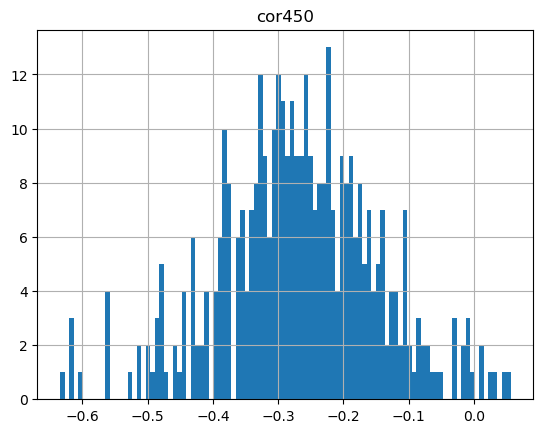

In [194]:
topn[['cor','cor450']].head(500).dropna().hist('cor450',bins=100)

In [201]:
topn.to_csv('data/res/epicor_n.csv')

<Axes: xlabel='dir', ylabel='0'>

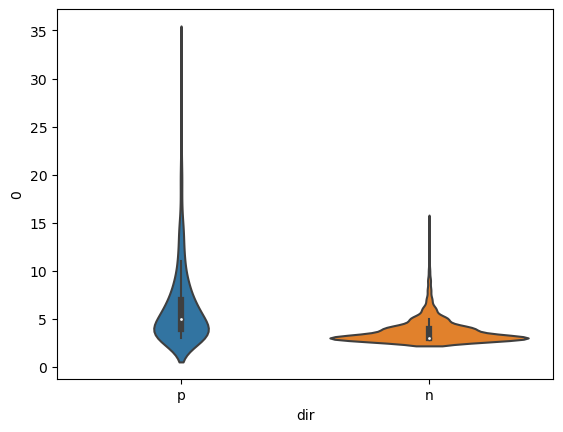

In [239]:
topp['dir']='p'
topn['dir']='n'
sns.violinplot(data=pd.concat([topp[[0,'dir']].head(500),topn[[0,'dir']].head(500)]),x='dir',y=0)